# Ensemble Learning
https://medium.com/@brijeshsoni121272/improving-machine-learning-predictions-with-ensemble-learning-a8646e00be1c

Ensemble learning is a technique that combines numerous base models to generate a more accurate and dependable model. The fundamental notion behind ensemble learning is that the aggregate predictions of multiple models can be more accurate and robust than individual model predictions. ![1_a6hnuJ8WM37mLimHfMORmQ.webp](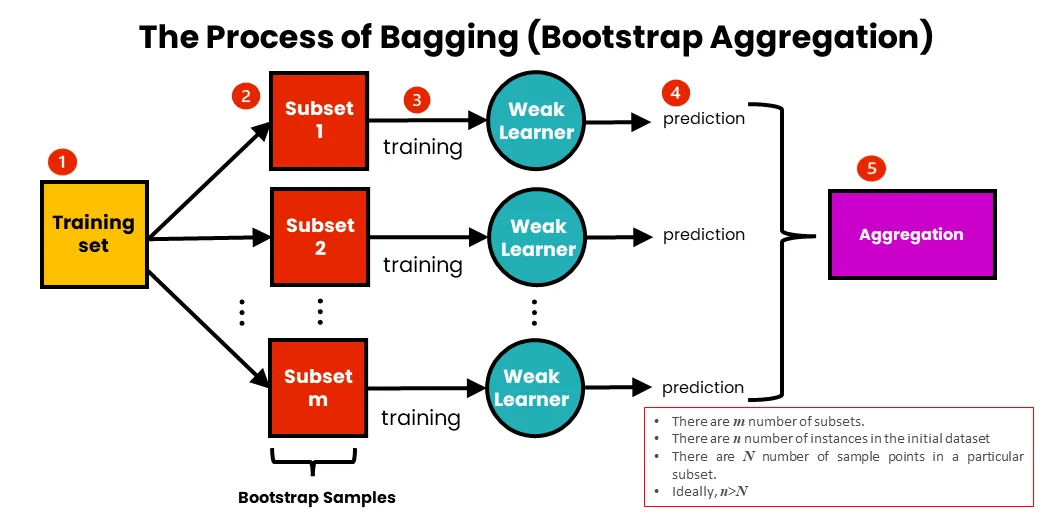![1_4XuD6oRrgVqtaSwH-cu6SA.webp](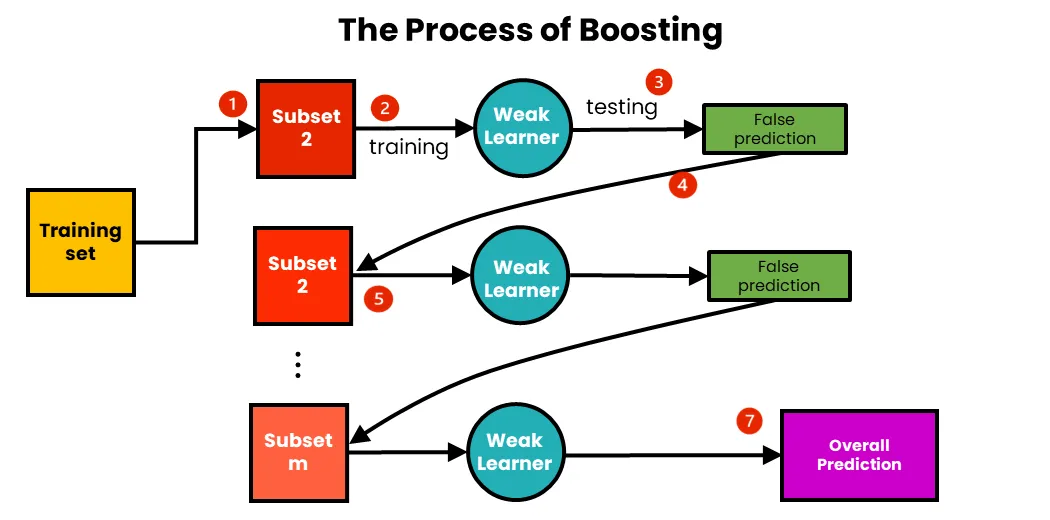![1_DM1DhgvG3UCEZTF-Ev5Q-A.webp](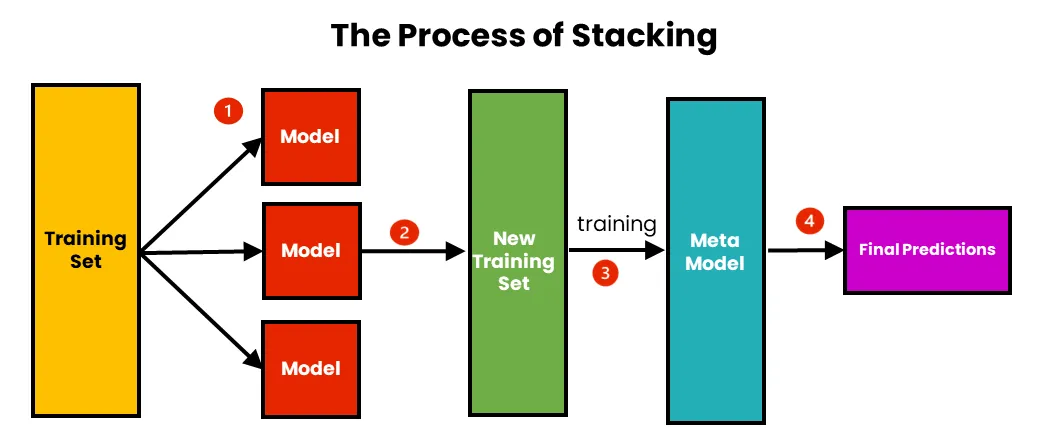![image_dab23a4c33.png](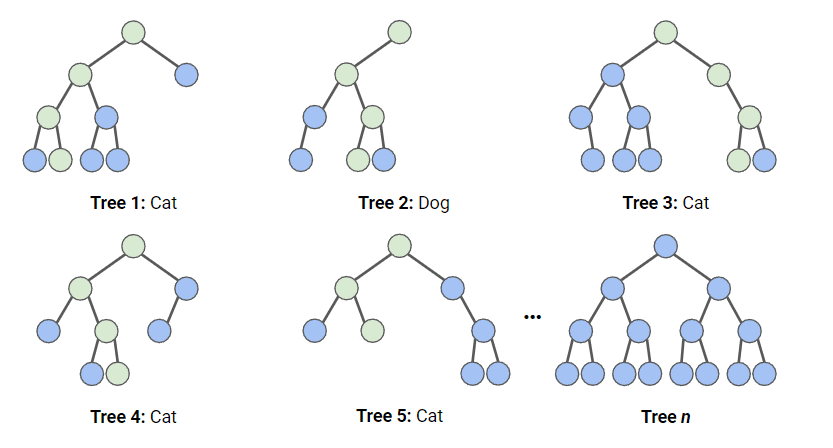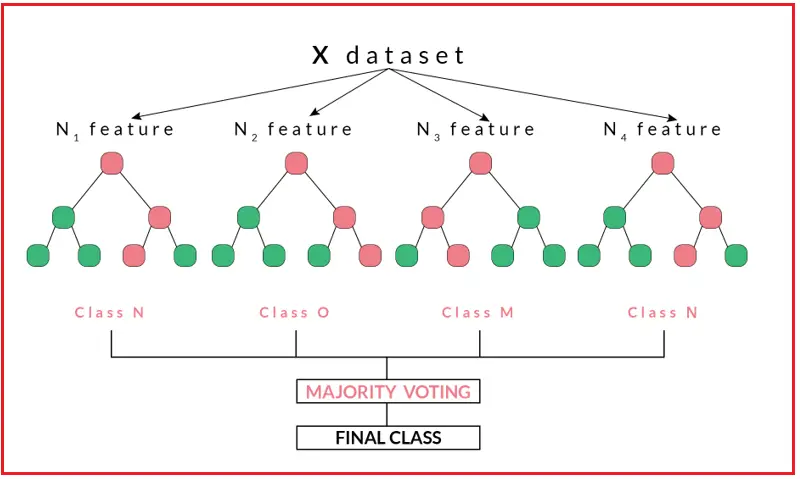))))

## Bagging || Boosting || Stacking || Random Forest

## Bagging
Bagging is a technique in which numerous instances of the same base model are trained on distinct portions of the training data. The subsets are generated via bootstrapping, which involves randomly selecting the training data with replacement.

In [ ]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model selection: Decision Tree Classifier
base_model = DecisionTreeClassifier(random_state=42)

# Create a BaggingClassifier with 10 base models
bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Fit the bagging model to the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_model.predict(X_test)

# Calculate accuracy of the bagging model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.96


In [ ]:
from sklearn.metrics import confusion_matrix
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[40  3]
 [ 2 69]]


In [ ]:
from sklearn.datasets import make_classification

# Generate synthetic data for inference
new_data, _ = make_classification(n_samples=10, n_features=X.shape[1], random_state=42)

print(new_data)
# Perform inference with the trained Bagging Classifier
new_data_predictions = bagging_model.predict(new_data)

# Display the generated data and corresponding predictions
print("\nGenerated Data for Inference:\n", new_data)
print("\nPredictions for new data:", new_data_predictions)


[[ 0.25988279  0.18463386 -0.97007347  1.30714275 -1.23086432 -0.82068232
   1.06833894  0.52194157 -0.68002472  0.22745993 -1.32045661  0.47383292
  -1.1913035   0.34644821  1.15859558  0.88394335  0.29307247  0.65655361
   0.29698467  0.2322537  -0.71435142  0.7870846  -1.60748323 -0.26156038
  -0.97468167 -1.23695071  1.86577451  0.25049285  0.78182287  0.81351722]
 [-0.88951443 -0.75373616 -1.18582677  1.89679298  0.41278093 -1.51484722
   1.72725924  0.2766908  -0.26465683  0.82206016  0.34115197  0.48247242
  -0.22346279  1.45353408 -0.84679372  1.42544359  0.62566735  0.71400049
   0.82718325  2.72016917 -0.85715756 -0.07282891 -0.24538812 -0.71206911
   0.47323762 -0.07710171 -1.0708925   0.01300189 -0.81581028  0.96337613]
 [-0.88385744  0.38531738 -0.99225135 -1.24573878  0.85639879  0.75896922
  -1.96287438  0.35778736 -1.37766937  0.21409374 -1.1429703   3.85273149
   0.57089051  1.05380205 -0.31526924 -1.59731763  0.51503527  1.13556564
   0.56078453 -0.93782504  0.5137859

In [ ]:
# Display the first five test samples
print("\nFirst five test samples:\n", X_test[:5])

# Perform inference with the trained Bagging Classifier on the first five test samples
first_five_predictions = bagging_model.predict(X_test[:5])

# Display the predictions for the first five test samples
print("\nPredictions for the first five test samples:", first_five_predictions)



First five test samples:
 [[1.247e+01 1.860e+01 8.109e+01 4.819e+02 9.965e-02 1.058e-01 8.005e-02
  3.821e-02 1.925e-01 6.373e-02 3.961e-01 1.044e+00 2.497e+00 3.029e+01
  6.953e-03 1.911e-02 2.701e-02 1.037e-02 1.782e-02 3.586e-03 1.497e+01
  2.464e+01 9.605e+01 6.779e+02 1.426e-01 2.378e-01 2.671e-01 1.015e-01
  3.014e-01 8.750e-02]
 [1.894e+01 2.131e+01 1.236e+02 1.130e+03 9.009e-02 1.029e-01 1.080e-01
  7.951e-02 1.582e-01 5.461e-02 7.888e-01 7.975e-01 5.486e+00 9.605e+01
  4.444e-03 1.652e-02 2.269e-02 1.370e-02 1.386e-02 1.698e-03 2.486e+01
  2.658e+01 1.659e+02 1.866e+03 1.193e-01 2.336e-01 2.687e-01 1.789e-01
  2.551e-01 6.589e-02]
 [1.546e+01 1.948e+01 1.017e+02 7.489e+02 1.092e-01 1.223e-01 1.466e-01
  8.087e-02 1.931e-01 5.796e-02 4.743e-01 7.859e-01 3.094e+00 4.831e+01
  6.240e-03 1.484e-02 2.813e-02 1.093e-02 1.397e-02 2.461e-03 1.926e+01
  2.600e+01 1.249e+02 1.156e+03 1.546e-01 2.394e-01 3.791e-01 1.514e-01
  2.837e-01 8.019e-02]
 [1.240e+01 1.768e+01 8.147e+01 4.678e+0

## Boosting
boostung is a supervised machine learning strategy that combines the predictions of multiple weak models (base models) to generate a powerful ensemble model.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model selection: Decision Tree Classifier
base_model = DecisionTreeClassifier(random_state=42)

# Create an AdaBoostClassifier with 50 base models
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Calculate accuracy of the AdaBoost model
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy
print("Accuracy of AdaBoost Classifier: {:.2f}".format(accuracy))

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy of AdaBoost Classifier: 0.94

Confusion Matrix:
 [[39  4]
 [ 3 68]]


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model selection: Decision Tree, Random Forest, and Support Vector Machine
base_model_dt = DecisionTreeClassifier(random_state=42)
base_model_rf = RandomForestClassifier(random_state=42)
base_model_svm = SVC(probability=True, random_state=42)

# Create AdaBoostClassifiers with 50 base models for each base classifier
adaboost_model_dt = AdaBoostClassifier(base_model_dt, n_estimators=50, random_state=42)
adaboost_model_rf = AdaBoostClassifier(base_model_rf, n_estimators=50, random_state=42)
adaboost_model_svm = AdaBoostClassifier(base_model_svm, n_estimators=50, random_state=42)

# Fit the AdaBoost models to the training data
adaboost_model_dt.fit(X_train, y_train)
adaboost_model_rf.fit(X_train, y_train)
adaboost_model_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = adaboost_model_dt.predict(X_test)
y_pred_rf = adaboost_model_rf.predict(X_test)
y_pred_svm = adaboost_model_svm.predict(X_test)

# Calculate accuracy of the AdaBoost models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Display accuracies
print("Accuracy of AdaBoost with Decision Tree: {:.2f}".format(accuracy_dt))
print("Accuracy of AdaBoost with Random Forest: {:.2f}".format(accuracy_rf))
print("Accuracy of AdaBoost with Support Vector Machine: {:.2f}".format(accuracy_svm))


Accuracy of AdaBoost with Decision Tree: 0.94
Accuracy of AdaBoost with Random Forest: 0.96
Accuracy of AdaBoost with Support Vector Machine: 0.95


## Stacking
Stacking  trains several base models on the same training dataset, then feeding their predictions into a higher-level model, also known as a meta-model or second-level model, to make the final prediction.


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the base models
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the validation set
dt_pred = dt.predict(X_val)
rf_pred = rf.predict(X_val)
gb_pred = gb.predict(X_val)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
mse_dt = mean_squared_error(y_val, dt_pred)
mae_dt = mean_absolute_error(y_val, dt_pred)
r2_dt = r2_score(y_val, dt_pred)

mse_rf = mean_squared_error(y_val, rf_pred)
mae_rf = mean_absolute_error(y_val, rf_pred)
r2_rf = r2_score(y_val, rf_pred)

mse_gb = mean_squared_error(y_val, gb_pred)
mae_gb = mean_absolute_error(y_val, gb_pred)
r2_gb = r2_score(y_val, gb_pred)

# Print performance data
print("Decision Tree Regressor:")
print("MSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}\n".format(mse_dt, mae_dt, r2_dt))

print("Random Forest Regressor:")
print("MSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}\n".format(mse_rf, mae_rf, r2_rf))

print("Gradient Boosting Regressor:")
print("MSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}\n".format(mse_gb, mae_gb, r2_gb))


Decision Tree Regressor:
MSE: 0.50, MAE: 0.45, R-squared: 0.62

Random Forest Regressor:
MSE: 0.26, MAE: 0.33, R-squared: 0.81

Gradient Boosting Regressor:
MSE: 0.29, MAE: 0.37, R-squared: 0.78



### Train the Meta Model
* use the predictions from the base models as input to the meta-model.
* use a linear regression model as the meta-model.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
# Combine the predictions of the base models into a single feature matrix
X_val_meta = np.column_stack((dt_pred, rf_pred, gb_pred))

# Train the meta-model on the combined feature matrix and the target values
meta_model = LinearRegression()
meta_model.fit(X_val_meta, y_val)


LinearRegression()

In [ ]:
# Make predictions on the validation set using the base models
dt_val_pred = dt.predict(X_val)
rf_val_pred = rf.predict(X_val)
gb_val_pred = gb.predict(X_val)

# Combine the validation set predictions of the base models into a single feature matrix
X_val_meta = np.column_stack((dt_val_pred, rf_val_pred, gb_val_pred))

# Use the trained meta-model to make predictions on the combined feature matrix
meta_model_pred = meta_model.predict(X_val_meta)

# Calculate performance metrics for the meta-model on the validation set
mse_meta = mean_squared_error(y_val, meta_model_pred)
mae_meta = mean_absolute_error(y_val, meta_model_pred)
r2_meta = r2_score(y_val, meta_model_pred)

# Print performance data for the meta-model on the validation set
print("Meta-Model Performance on Validation Set:")
print("MSE: {:.2f}, MAE: {:.2f}, R-squared: {:.2f}\n".format(mse_meta, mae_meta, r2_meta))


Meta-Model Performance on Validation Set:
MSE: 0.25, MAE: 0.32, R-squared: 0.81



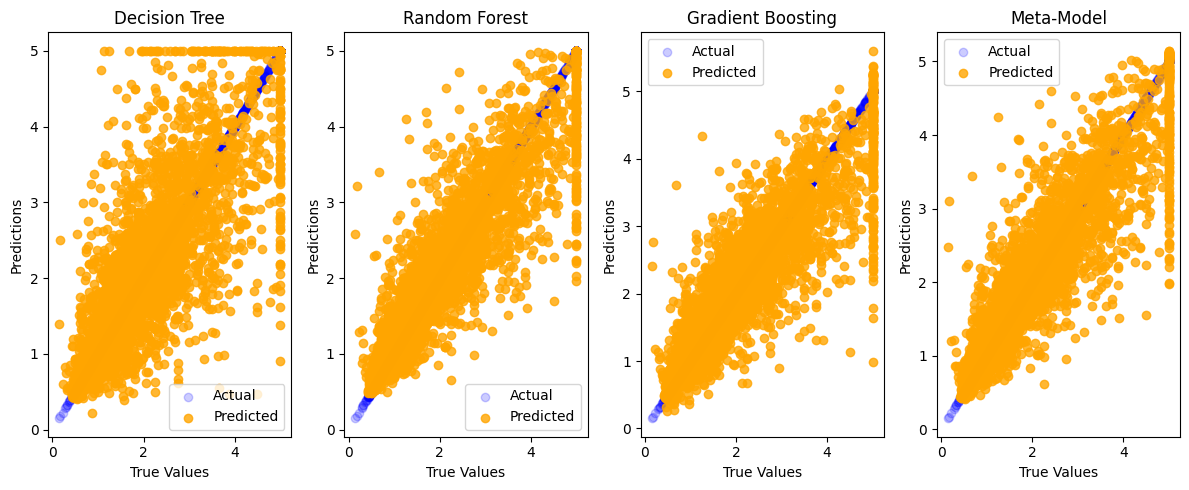

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Decision Tree Regressor
plt.figure(figsize=(12, 5))

# Scatter plot for Decision Tree Regressor
plt.subplot(1, 4, 1)
plt.scatter(y_val, y_val, color='blue', label='Actual', alpha=0.2)
plt.scatter(y_val, dt_val_pred, color='orange', label='Predicted', alpha=0.8)
plt.title('Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Scatter plot for RandomForest Regressor
plt.subplot(1, 4, 2)
plt.scatter(y_val, y_val, color='blue', label='Actual', alpha=0.2)
plt.scatter(y_val, rf_val_pred, color='orange', label='Predicted', alpha=0.8)
plt.title('Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Scatter plot for Gradient Boosting Regressor
plt.subplot(1, 4, 3)
plt.scatter(y_val, y_val, color='blue', label='Actual', alpha=0.2)
plt.scatter(y_val, gb_val_pred, color='orange', label='Predicted', alpha=0.8)
plt.title('Gradient Boosting')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Scatter plot for Meta-Model
plt.subplot(1, 4, 4)
plt.scatter(y_val, y_val, color='blue', label='Actual', alpha=0.2)
plt.scatter(y_val, meta_model_pred, color='orange', label='Predicted', alpha=0.8)
plt.title('Meta-Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

plt.tight_layout()
plt.show()


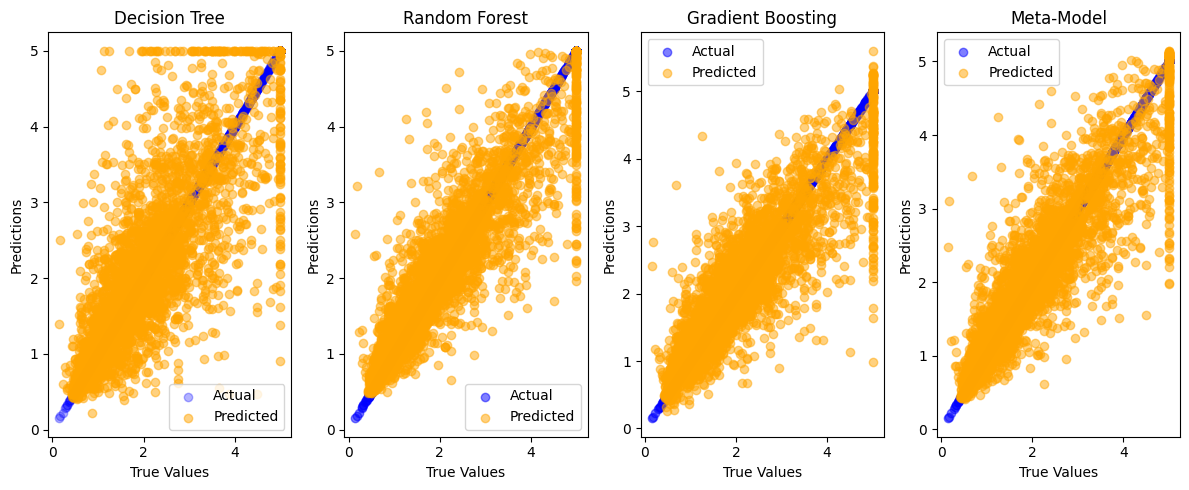

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Decision Tree Regressor
plt.figure(figsize=(12, 5))

# Actual values in blue
plt.subplot(1, 4, 1)
plt.scatter(y_val, y_val, color='blue', label='Actual', alpha=0.5)
# Predicted values in orange
plt.scatter(y_val, dt_val_pred, color='orange', label='Predicted', alpha=0.5)
plt.title('Decision Tree')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Scatter plot for RandomForest Regressor
plt.subplot(1, 4, 2)
plt.scatter(y_val, y_val, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_val, rf_val_pred, color='orange', label='Predicted', alpha=0.5)
plt.title('Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Scatter plot for Gradient Boosting Regressor
plt.subplot(1, 4, 3)
plt.scatter(y_val, y_val, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_val, gb_val_pred, color='orange', label='Predicted', alpha=0.5)
plt.title('Gradient Boosting')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Scatter plot for Meta-Model
plt.subplot(1, 4, 4)
plt.scatter(y_val, y_val, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_val, meta_model_pred, color='orange', label='Predicted', alpha=0.5)
plt.title('Meta-Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Make pkredictions on new data
X_new = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]])

dt_pred_new = dt.predict(X_new)
rf_pred_new = rf.predict(X_new)
gb_pred_new = gb.predict(X_new)

# Combine the predictions of the base models into a single feature matrix
X_new_meta = np.column_stack((dt_pred_new, rf_pred_new, gb_pred_new))

# Make a prediction using the meta-model
y_new_pred = meta_model.predict(X_new_meta)

print("Predicted median value of owner-occupied homes: ${:.2f} thousand".format(y_new_pred[0]))


Predicted median value of owner-occupied homes: $1.70 thousand


Diabetes data

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Split the data into training and test sets
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Base model selection: Decision Tree, Random Forest, and Gradient Boosting
base_model_dt = DecisionTreeRegressor(random_state=42)
base_model_rf = RandomForestRegressor(random_state=42)
base_model_gb = GradientBoostingRegressor(random_state=42)

# Train the base models
base_model_dt.fit(X_train_diabetes, y_train_diabetes)
base_model_rf.fit(X_train_diabetes, y_train_diabetes)
base_model_gb.fit(X_train_diabetes, y_train_diabetes)

# Make predictions on the test set using the base models
dt_pred_diabetes = base_model_dt.predict(X_test_diabetes)
rf_pred_diabetes = base_model_rf.predict(X_test_diabetes)
gb_pred_diabetes = base_model_gb.predict(X_test_diabetes)

# Combine the predictions of the base models into a single feature matrix
X_test_meta_diabetes = np.column_stack((dt_pred_diabetes, rf_pred_diabetes, gb_pred_diabetes))

# Train the meta-model (Linear Regression) on the combined feature matrix and the target values
meta_model_diabetes = LinearRegression()
meta_model_diabetes.fit(X_test_meta_diabetes, y_test_diabetes)

# Make predictions on the test set using the meta-model
meta_model_pred_diabetes = meta_model_diabetes.predict(X_test_meta_diabetes)

# Calculate performance metrics for the meta-model
mse_meta_diabetes = mean_squared_error(y_test_diabetes, meta_model_pred_diabetes)

# Print performance data for the meta-model
print("Meta-Model Performance on Diabetes Test Set:")
print("MSE: {:.2f}\n".format(mse_meta_diabetes))


Meta-Model Performance on Diabetes Test Set:
MSE: 2822.52



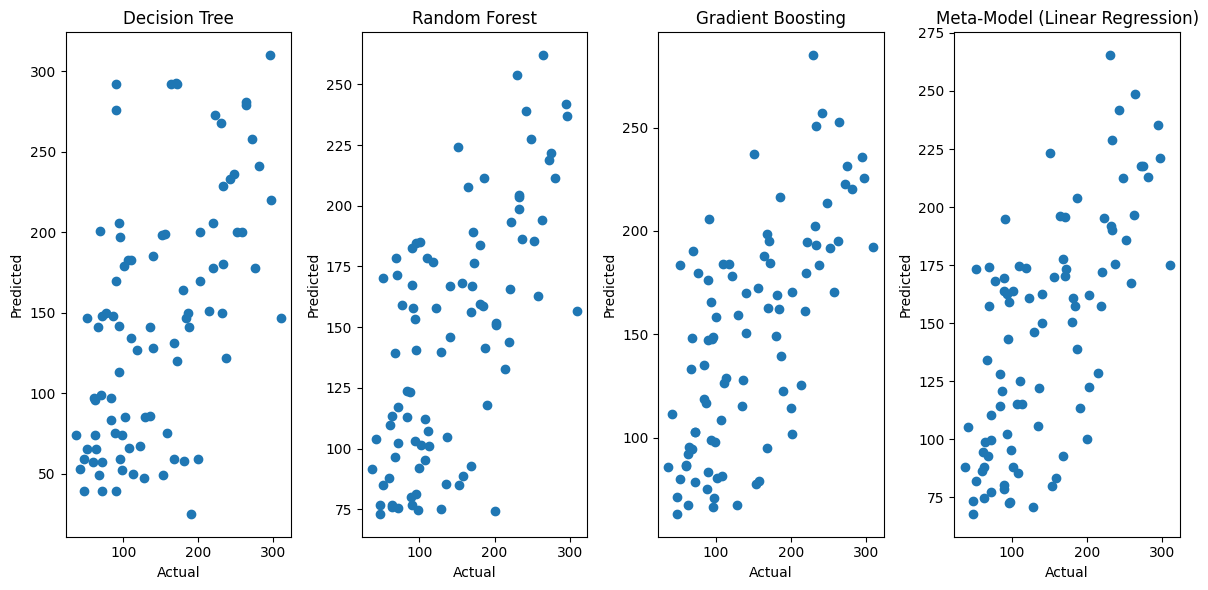

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values by base models
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.scatter(y_test_diabetes, dt_pred_diabetes)
plt.title('Decision Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 4, 2)
plt.scatter(y_test_diabetes, rf_pred_diabetes)
plt.title('Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 4, 3)
plt.scatter(y_test_diabetes, gb_pred_diabetes)
plt.title('Gradient Boosting')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for actual vs predicted values by meta-model
plt.subplot(1, 4, 4)
plt.scatter(y_test_diabetes, meta_model_pred_diabetes)
plt.title('Meta-Model (Linear Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


In [ ]:
# Create a new data point for inference with the correct number of features
new_data_point = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]])

# Make predictions on the new data point using the base models
dt_inference = base_model_dt.predict(new_data_point)
rf_inference = base_model_rf.predict(new_data_point)
gb_inference = base_model_gb.predict(new_data_point)

# Combine the predictions into a single feature matrix
X_inference = np.column_stack((dt_inference, rf_inference, gb_inference))

# Use the trained meta-model to make predictions on the combined feature matrix
meta_model_inference = meta_model_diabetes.predict(X_inference)

# Display the predictions
print("Inference Results:")
print("Base Model Predictions:", dt_inference, rf_inference, gb_inference)
print("Meta-Model Prediction:", meta_model_inference)


Inference Results:
Base Model Predictions: [306.] [254.7] [293.1799789]
Meta-Model Prediction: [273.4325164]


## Random Forest


Random Forest build multiple decision trees during training and output the average prediction (for regression tasks) or the majority vote (for classification tasks) of the individual trees as the final.


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import pandas as pd

# Load Titanic dataset from seaborn
titanic_data = sns.load_dataset('titanic')

# Select relevant features and target variable
X = titanic_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic_data['survived']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['sex'], drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_imputed)

# Evaluate the performance of the Random Forest model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



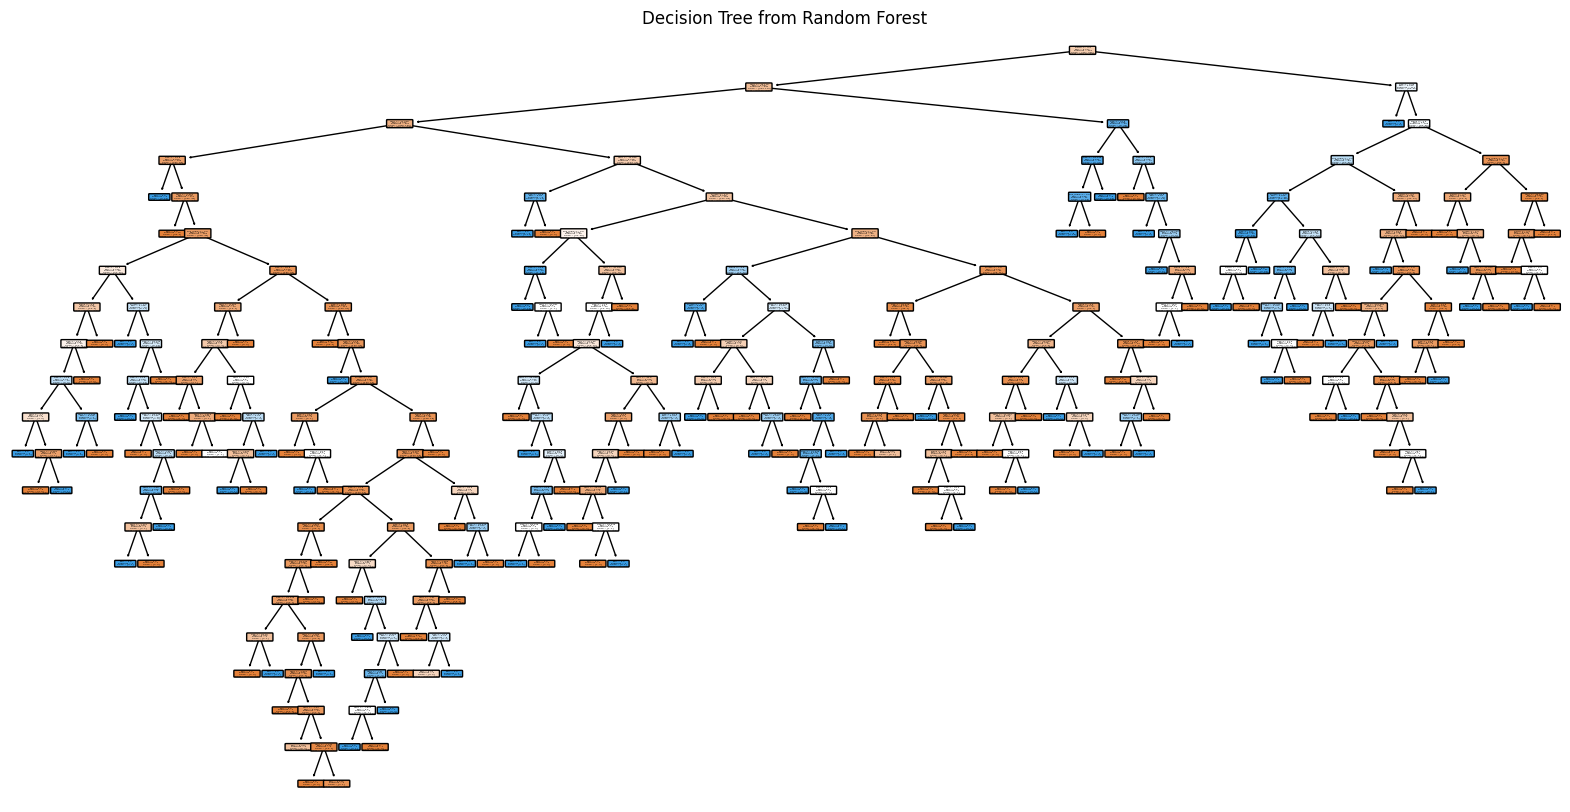

In [ ]:
from sklearn.tree import plot_tree

# Visualize one of the trees from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.title('Decision Tree from Random Forest')
plt.show()


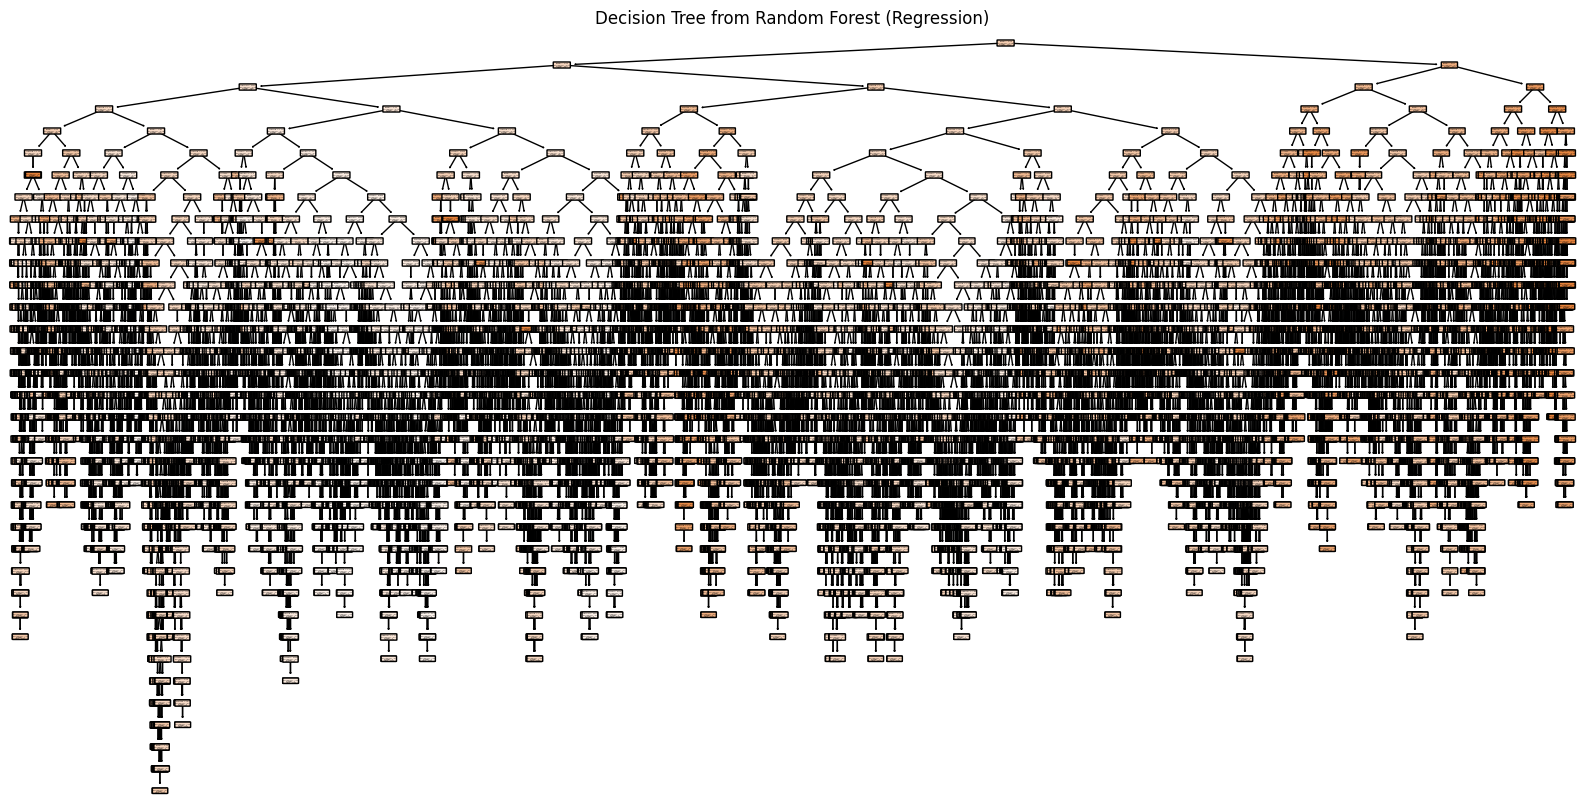

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Visualize one of the trees from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_regressor.estimators_[0], filled=True, feature_names=california_housing.feature_names, rounded=True)
plt.title('Decision Tree from Random Forest (Regression)')
plt.show()


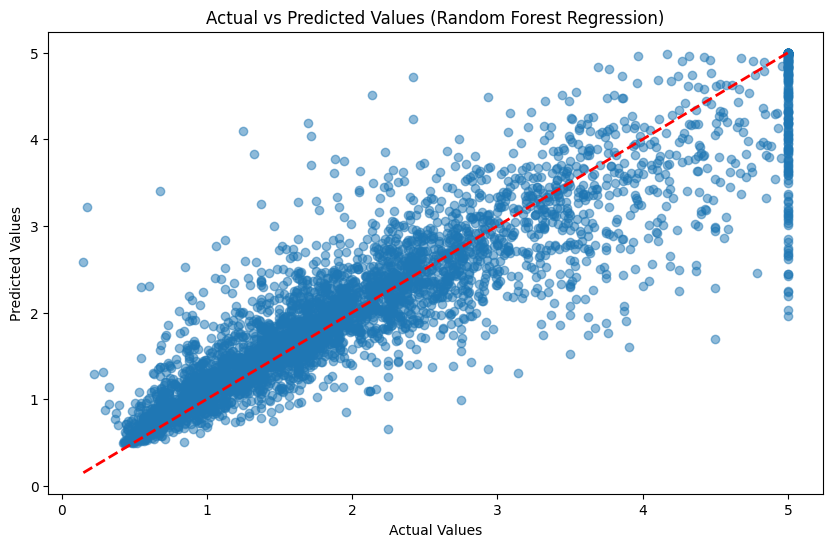

In [ ]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.title('Actual vs Predicted Values (Random Forest Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
